# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://s3.wi-fi.ru/cp3o/zqEeEKCkhPUnnwD3dHmuEmQq?response-content-type=image%2Fjpeg" width=500/></p>



Тем не менее, не время расслабляться! На этот раз, мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- Загрузить данные
- Посмотреть и размер, и примеры данных
- Проверить количество пропусков в данных
    - Убедиться, что пропусков в данных нет и можно строить **baseline**
- Делим данные на train и test 
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже
- Создаем baseline модель, снимаем метрики на тестовой выборке
- Производим анализ данных, готовим план по очистке и предобработке данных
- Создаем функцию очистки
- Производим очистку train и test выборок -> обучаем модель с очищенными данными
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение
- Создаем класс предобработки данных
- Производим предобработку очищенных данных -> обучаем модель
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- По признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю
- Сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые
- Оставить только признаки с высокой корреляцией с целевой переменной
- Посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих
- Посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум
- Комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!

In [1]:
# Зафиксируем состояние случайных чисел
import numpy as np
import random

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты по вашим размышлениям и процессу улучшения модели.

Успехов вам, мы в вас верим и уверены, что вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/kail4ek/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>

In [3]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
import matplotlib
import pandas as pd
import seaborn as sns

In [7]:
df_src = pd.read_csv('boston.csv')
print(df_src.shape)
df_src.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
data=df_src.copy()
labels=data.pop('MEDV')

In [9]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)
train_labels, test_labels= train_test_split(labels, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

In [12]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(train_data, train_labels)
y_pred = reg_model.predict(test_data)

#рассчет r2
r2 = reg_model.score(test_data, test_labels)
print(f'r2 is equal {r2} ')
#рассчет MAE
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(test_labels, y_pred)
print(f'MAE is equal {MAE} ')
#рассчитат mse
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_labels, y_pred)
print(f'MSE is equal {MSE} ')

r2 is equal 0.7112260057484872 
MAE is equal 3.16270987145746 
MSE is equal 21.517444231177663 


<AxesSubplot:>

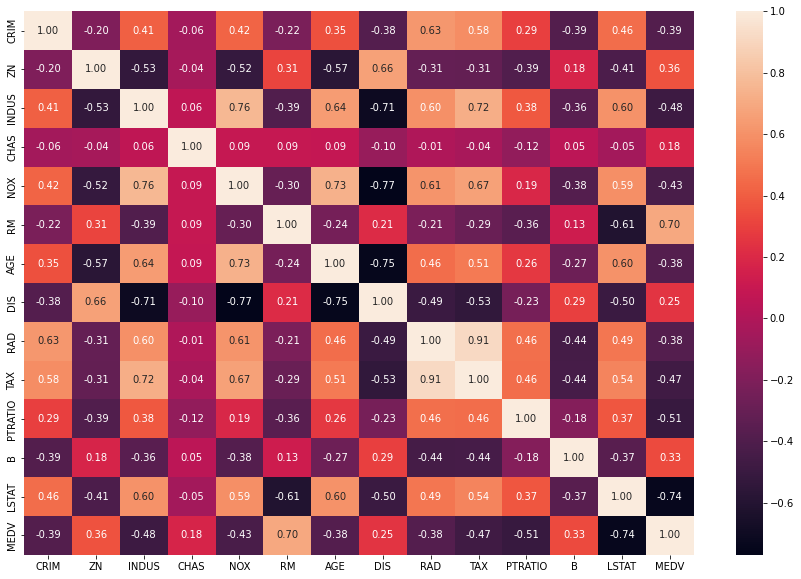

In [13]:
correlation_mtrx = df_src.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

In [24]:
test_data.loc[:,'MEDV'] = test_labels
train_data.loc[:,'MEDV'] = train_labels
train_data.head()

C:\Users\vlaik\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04,21.2
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21,19.3
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13,19.1


In [25]:
train_data_bc=train_data.copy()
outliers_mask_0 = (train_data_bc['INDUS'] > 14) & (train_data_bc['INDUS'] < 15.5)
outliers_mask_4 = (train_data_bc['NOX'] > 0.8) 

outliers_mask_1 = train_data_bc['MEDV'] == 50
outliers_mask_2 = train_data_bc['RM'] < 4
outliers_mask_3 = (train_data_bc['RM'] > 8) & (train_data_bc['MEDV'] < 30)

outliers_mask = outliers_mask_1 |  outliers_mask_3 |  outliers_mask_2 |  outliers_mask_0 |  outliers_mask_4 
df_cleaned_train = train_data_bc.loc[~outliers_mask]
correlation_mtrx1 =df_cleaned_train.corr()

In [29]:
a = correlation_mtrx <= correlation_mtrx1
t = 0
f = 0
for i in range(len(a)):
    for j in range(len(a)): 
        if a.iloc[i,j]==True:
            t+=1
        else:
            f+=1
print(t)
print(f)

108
88


In [27]:
test_data_bc = test_data.copy()
outliers_mask_0 = (test_data_bc['INDUS'] > 14) & (test_data_bc['INDUS'] < 15.5)
outliers_mask_4 = (test_data_bc['NOX'] > 0.8)
outliers_mask_5 =test_data_bc['RAD'] > 20 

outliers_mask_1 = test_data_bc['MEDV'] == 50
outliers_mask_2 = test_data_bc['RM'] < 4
outliers_mask_3 = (test_data_bc['RM'] > 8) & (test_data_bc['MEDV'] < 30)

outliers_mask = outliers_mask_1 |  outliers_mask_3 |  outliers_mask_2 |  outliers_mask_0 |  outliers_mask_4 | outliers_mask_5
df_cleaned_test = test_data_bc.loc[~outliers_mask]
correlation_mtrx2 =df_cleaned_test.corr()

In [28]:
a = correlation_mtrx <= correlation_mtrx2
t = 0
f = 0
for i in range(len(a)):
    for j in range(len(a)):
        if a.iloc[i,j] == True:
            t += 1
        else:
            f += 1
print(t)
print(f)

110
86


In [39]:
def metrics(train,test):
    train_data = train.copy()
    train_labels = train_data.pop('MEDV')
    test_data = test.copy()
    test_labels = test_data.pop('MEDV')
    
    reg_model = LinearRegression()
    reg_model.fit(train_data, train_labels)
    y_pred = reg_model.predict(test_data)

    r2 = reg_model.score(test_data, test_labels)
    MSE=mean_squared_error(test_labels, y_pred)
    MAE=mean_absolute_error(test_labels, y_pred)

    var_dict = {
        'r2_score' : r2,
        'mse_score' : MSE,
        'mae_score' : MAE,     
              
    }
    return var_dict

In [40]:
metrics(df_cleaned_train,df_cleaned_test)

{'r2_score': 0.8303947954478896,
 'mse_score': 8.231451836598257,
 'mae_score': 2.1851208405558444}

In [41]:
#Использование модели Лассо 
from sklearn import linear_model

Las = linear_model.Lasso(alpha=0.0000001, random_state=RANDOM_SEED)
train_data = df_cleaned_train.copy()
train_labels = train_data.pop('MEDV')
test_data = df_cleaned_test.copy()
test_labels = test_data.pop('MEDV')
Las.fit(train_data, train_labels)
weights = Las.coef_

print(Las.intercept_)

print(f'Weights min: {weights.min()}')
print(f'Weights max: {weights.max()}')

print(weights)

16.294701664991585
Weights min: -8.021929571897896
Weights max: 5.209663475238104
[-1.19349358e-01  2.44334554e-02  3.40540934e-03  8.86991420e-01
 -8.02192957e+00  5.20966348e+00 -4.49439016e-02 -1.07578838e+00
  1.62445877e-01 -1.03598837e-02 -7.20843977e-01  1.25033906e-02
 -3.05542647e-01]


In [42]:
def metrics1(train,test, model):
    train_data = train.copy()
    train_labels = train_data.pop('MEDV')
    test_data = test.copy()
    test_labels = test_data.pop('MEDV')
    model.fit(train_data, train_labels)
    y_pred = model.predict(test_data)
    r2 = model.score(test_data, test_labels)
    MSE = mean_squared_error(test_labels, y_pred)
    MAE = mean_absolute_error(test_labels, y_pred)
    var_dict = {
        'r2_score' : r2,
        'mse_score' : MSE,
        'mae_score' : MAE,             
        }
    return var_dict

In [36]:
sort_train = df_cleaned_train.drop(['DIS'], axis=1)
sort_test = df_cleaned_test.drop(['DIS'], axis=1)
metrics1(df_cleaned_train,df_cleaned_test,Las)

{'r2_score': 0.8303947624291734,
 'mse_score': 8.23145343909609,
 'mae_score': 2.1851208731133855}

In [43]:
metrics(df_cleaned_train,df_cleaned_test)

{'r2_score': 0.8303947954478896,
 'mse_score': 8.231451836598257,
 'mae_score': 2.1851208405558444}

In [44]:
metrics(sort_train,sort_test)

{'r2_score': 0.7993282565330343,
 'mse_score': 9.73920461743269,
 'mae_score': 2.3457381908657147}

In [46]:
#Регуляризация и удаление взаимнокоррелирующих данных не улучшила метрики
train_data.loc[:,'MEDV']=train_labels
copy_train = train_data.copy()
c = copy_train['CRIM']
is_CRIM = pd.DataFrame(np.zeros(len(c)))
global is_CRIM
for j in range(len(c)):
    for i in c:
        if i<0.01:
            is_CRIM.loc[j,0]=0
        else:
            is_CRIM.loc[j,0]=1

In [47]:
from sklearn.preprocessing import MinMaxScaler

class DataPreprocessing:
    def __init__(self):
        self.scaler = MinMaxScaler()
        
    def fit(self, data_set):
        DIS_log = np.log(data_set['DIS']) 
        data_set.loc[:,'DIS'] = DIS_log
        data_set.loc[:,'LSTAT_poly_2'] = data_set['LSTAT']**2 
        data_set.reset_index(inplace = True)
        data_set.loc[:,'is_CRIM'] = is_CRIM[0]
        
        self.mask_0 = (data_set['INDUS'] > 14) & (data_set['INDUS'] < 15.5)
        self.mask_4 = (data_set['NOX'] > 0.8) 
        self.mask_1 = data_set['MEDV'] == 50
        self.mask_2 = data_set['RM'] < 4
        self.mask_3 = (data_set['RM'] > 8) & (data_set['MEDV'] < 30)
        self.scaler=self.scaler.fit(data_set)

    def transform(self, data_set):
        outliers_mask = self.mask_1 |  self.mask_3 |  self.mask_2 |  self.mask_0 |  self.mask_4 
        df_cleaned_train = data_set.loc[~outliers_mask]
        scaled_data = self.scaler.transform(df_cleaned_train)
        scaled_data = pd.DataFrame({'CRIM':scaled_data[:,0],'ZN': scaled_data[:,1],'INDUS': scaled_data[:,2],
                                   'CHAS': scaled_data[:,3], 'NOX': scaled_data[:,4], 'RM': scaled_data[:,5], 'AGE': scaled_data[:,6],
                                   'DIS': scaled_data[:,7], 'RAD': scaled_data[:,8], 'TAX': scaled_data[:,9], 'PTRATIO': scaled_data[:,10], 
                                   'B': scaled_data[:,11], 'LSTAT': scaled_data[:,12], 'MEDV': scaled_data[:,13], 'LSTAT_poly_2': scaled_data[:,14],
                                   'is_CRIM': scaled_data[:,15]})
        return  scaled_data

In [48]:
data_set = train_data.copy()
preproc = DataPreprocessing() 
preproc.fit(data_set)  
scaled_train = preproc.transform(data_set)

In [49]:
test_data.loc[:,'MEDV'] = test_labels
data_set  = test_data.copy()
preproc = DataPreprocessing() 
preproc.fit(data_set)  
scaled_test = preproc.transform(data_set)
metrics(scaled_train,scaled_test)

{'r2_score': 0.9639069841204522,
 'mse_score': 0.001931044873065866,
 'mae_score': 0.03378988633485676}

r2 > 0.96. Это свидетельствует о качественности предсказаний модеkb. 